#### TASK 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv("/content/spam.csv",encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.rename({"v1":"label","v2":"text"},inplace=True,axis=1)

In [ ]:
df.tail()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
#X = df.drop("text",axis=1)
#y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0) 

In [ ]:
print("Before Oversampling, count of label '1': {}".format(sum(y_train==1)))
print("Before Oversampling, count of label '0': {} \n".format(sum(y_train==0)))

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After Oversampling, the shape of train_X:{} '.format(X_train_res.shape))
print('After Oversampling, the shape of train_y:{} \n'.format(y_train_res.shape))

print("After Oversampling, count of label '1':{}".format(y_train_res==1))
print("After Oversampling, count of label '0':{}".format(y_train_res==0))

Before Oversampling, count of label '1': 581
Before Oversampling, count of label '0': 3876 

After Oversampling, the shape of train_X:(7752, 7163) 
After Oversampling, the shape of train_y:(7752,) 

After Oversampling, count of label '1':[False False False ...  True  True  True]
After Oversampling, count of label '0':[ True  True  True ... False False False]


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import re
corpus=[]
length=len(df)

In [ ]:
for i in range (0,length):
  text =re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
  text=text.lower()
  text=text.split()
  pe=PorterStemmer()
  stopword=stopwords.words("english")
  text=[pe.stem(word) for word in text if not word in set(stopword)]
  text=" ".join(text)
  corpus.append(text)

In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=35000)
X=cv.fit_transform(corpus).toarray()
#y=pd.get_dummies(df['label'])
#y=y.iloc[:,1].values

In [ ]:
import pickle
pickle.dump(cv,open('ck1.pkl','wb'))

### TASK 3

In [ ]:
df.describe()

In [ ]:
df.shape

(5572, 5)

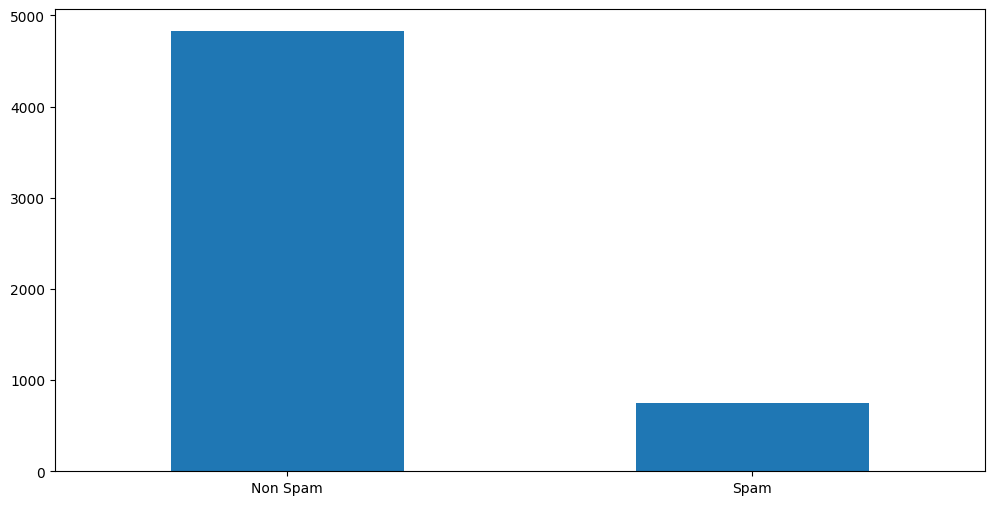

In [ ]:
df["label"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2),('Non Spam','Spam'),rotation=0);

### TASK 4

In [204]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#X_bal=sc.fit_transform(X_bal)
#X_bal=pd.DataFrame(X_bal,columns=names)

In [205]:
from sklearn.model_selection import train_test_split
X_test, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.20,random_state=0)

In [206]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [158]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [159]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_res,y_train_res)

MultinomialNB()

In [160]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [161]:
model=Sequential()

In [162]:
X_train.shape

(4457, 7163)

In [163]:
model.add(Dense(units=X_train_res.shape[1], activation="relu", kernel_initializer="random_uniform"))

In [164]:
model.add(Dense(units=100, activation="relu", kernel_initializer="random_uniform"))

In [165]:
model.add(Dense(units=100, activation="relu", kernel_initializer="random_uniform"))

In [166]:
model.add(Dense(units=1,activation="sigmoid"))

In [167]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [168]:
generator = model.fit(X_train, y_train, epochs=10, steps_per_epoch=len(X_train)//64)

Epoch 1/10
69/69 [==============================] - 88s 1s/step - loss: 0.1427 - accuracy: 0.9607
Epoch 2/10
69/69 [==============================] - 86s 1s/step - loss: 0.0064 - accuracy: 0.9982
Epoch 3/10
69/69 [==============================] - 88s 1s/step - loss: 8.4821e-04 - accuracy: 0.9998
Epoch 4/10
69/69 [==============================] - 85s 1s/step - loss: 2.1720e-04 - accuracy: 1.0000
Epoch 5/10
69/69 [==============================] - 88s 1s/step - loss: 1.1451e-04 - accuracy: 1.0000
Epoch 6/10
69/69 [==============================] - 86s 1s/step - loss: 7.6160e-05 - accuracy: 1.0000
Epoch 7/10
69/69 [==============================] - 85s 1s/step - loss: 5.4688e-05 - accuracy: 1.0000
Epoch 8/10
69/69 [==============================] - 86s 1s/step - loss: 4.0849e-05 - accuracy: 1.0000
Epoch 9/10
69/69 [==============================] - 82s 1s/step - loss: 3.2102e-05 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 87s 1s/step - loss: 2.5762e-05 - accu

In [ ]:
generator = model.fit(X_train, y_train, epochs=10, steps_per_epoch=len(X_train)//64)

Epoch 1/10
69/69 [==============================] - 0s 7ms/step - loss: 0.7312 - accuracy: 0.0000e+00
Epoch 2/10
69/69 [==============================] - 0s 6ms/step - loss: 0.6819 - accuracy: 0.0000e+00
Epoch 3/10
69/69 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.0000e+00
Epoch 4/10
69/69 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.0000e+00
Epoch 5/10
69/69 [==============================] - 0s 5ms/step - loss: 0.6639 - accuracy: 0.0000e+00
Epoch 6/10
69/69 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.0000e+00
Epoch 7/10
69/69 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.0000e+00
Epoch 8/10
69/69 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.0000e+00
Epoch 9/10
69/69 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.0000e+00
Epoch 10/10
69/69 [==============================] - 0s 4ms/step - loss: 0.6637 - 

In [169]:
X,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([0, 0, 1, ..., 0, 0, 0], dtype=uint8))

In [174]:
y_pred=model.predict(X_test)
y_pred

35/35 [==============================] - 5s 140ms/step


array([[4.4100175e-12],
       [1.2427345e-05],
       [1.0847211e-09],
       ...,
       [2.9975703e-07],
       [1.6667042e-13],
       [1.3438063e-10]], dtype=float32)

In [172]:
y_pr=np.where(y_pred>0.5,1,0)
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [176]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pr)
score=accuracy_score(y_test,y_pr)
print(cm)
print('Accuracy Score Is:- ',score*100)

[[948   1]
 [ 12 154]]
Accuracy Score Is:-  98.83408071748879


In [189]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]',' ', new_review)
  new_review = new_review
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  print(new_X_test)
  new_y_pred = model.predict(new_X_test)
  print(new_y_pred)
  new_X_pred=np.where(new_y_pred>0.5,1,0)
  return new_y_pred
new_review=new_review(str(input("Enter new review...")))


Enter new review...hello fg hou hkl
[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 0s 68ms/step
[[0.00853127]]


### TASK (5)

In [203]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#cm = confusion_matrix(y_test, y_pred)
#score = accuracy_score(y_test,y_pred)
#print("Confusion Matrix:\n", cm)
#print("Accuracy Score Is Naive Bayes : - ", score*100)

In [199]:
#cm=confusion_matrix(y_test,y_pred)
#score=accuracy_score(y_test,y_pred)
#print(cm)
#print("Accuracy Score Is  : - ",score*100)

#cm1=confusion_matrix(y_test,y_pred1)
#score1=accuracy_score(y_test,y_pred1)
#print(cm1)
#print("Accuracy Score Is  : - ",score*100)

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score
#cm=confusion_matrix(y_test,y_pr)
#score = accuracy_score(y_test,y_pr)
#print(cm)
#print("Accuracy Score Is Naive Bayes : - ",score*100)

In [ ]:
#from sklearn.metrics import confusion_matrix,accuracy_score
#from sklearn.metrics import confusion_matrix, accuracy_score
#cm=confusion_matrix(y_test,y_pr)
#score = accuracy_score(y_test,y_pr)
#print(cm)
#print("Accuracy Score Is Naive Bayes : - ",score*100)

#### TASK 6

In [200]:
model.save('spam.h5')